In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y = a + b*x  
a и b - коэффициенты линейной регрессии  
a - intercept  
b - slope (наклон прямой)

In [2]:
def mse_(y, y_pred):
    return np.sum((y_pred-y)**2)/len(y)

**1) Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).  
Произвести расчет как с использованием intercept, так и без.**

In [3]:
x = zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

### Способ 1:

Коэффициенты уравнения линейной регрессии можно найти следующим образом:  
$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$

$$a = \overline{y} - b \cdot {\overline{x}}.$$

In [4]:
b = ((x*y).mean()-x.mean()*y.mean()) / ((x**2).mean()-x.mean()**2)
b

2.620538882402765

In [5]:
a = y.mean() - b*x.mean()
a

444.1773573243596

y_ = 444.1773573243596 + 2.620538882402765*x

In [6]:
y_pred = a + b * x
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [7]:
mse_(y, y_pred)

6470.414201176658

<function matplotlib.pyplot.show(*args, **kw)>

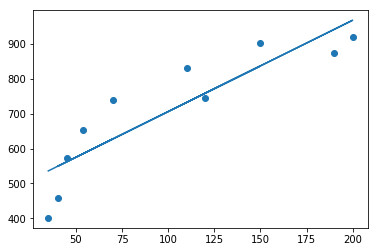

In [8]:
plt.scatter(x, y)
plt.plot(x, y_pred)
plt.show

### Способ 2:

$W = (X \cdot X^T)^{-1} \cdot X \cdot y^T$

#### Без intercept:

In [9]:
X_mtrx = x.reshape((1, len(x)))
X_mtrx

array([[ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110]])

In [10]:
y_mtrx = y.reshape((1,len(x)))
y_mtrx

array([[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]])

In [11]:
coefs_ = np.linalg.inv(X_mtrx @ X_mtrx.T) @ X_mtrx @ y_mtrx.T
coefs_

array([[5.88982042]])

In [12]:
y_pred = 0 + coefs_[0,0] * x
y_pred

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

In [13]:
mse_(y, y_pred)

56516.85841571941

#### С intercept:

In [14]:
X_mtrx = np.vstack([np.ones((1,len(x))), x])
X_mtrx

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.]])

In [15]:
y_mtrx = y.reshape((1,len(x)))
y_mtrx

array([[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]])

In [16]:
coefs_ = np.linalg.inv(X_mtrx @ X_mtrx.T) @ X_mtrx @ y_mtrx.T
coefs_

array([[444.17735732],
       [  2.62053888]])

In [17]:
a, b = coefs_
print("a:", a)
print("b:", b)

a: [444.17735732]
b: [2.62053888]


### Способ 3:

**2) Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).**

#### Без intercept:

In [18]:
def mse_2(w1):
    return np.sum((w1*x - y)**2) / len(x)

In [19]:
# Проверка функции mse_2 на коэффициенте полученном ранее
mse_2(5.88982042)

56516.85841571943

f = (1/n) \* np.sum((w1\*X - y)\*\*2)  
f_p = (1/n) \* np.sum(2 \* (w1\*X - y) \* X) = (2/n) * np.sum((w1\*X - y) \* X)

In [20]:
alpha = 1e-6
w1 = 0.1
for i in range(500):
    w1 -= alpha * (2/len(x)) * np.sum((w1*x - y) * x)
    if i % 10 == 0:
        print("Iteration: {i}; w1 = {w1}; mse = {mse}".format(i=i, w1=w1, mse=mse_2(w1)))

Iteration: 0; w1 = 0.25952808; mse = 493237.7212546963
Iteration: 10; w1 = 1.6319792141937546; mse = 306275.7568040035
Iteration: 20; w1 = 2.6698789606516935; mse = 199352.96411174876
Iteration: 30; w1 = 3.4547782236263824; mse = 138204.25062502263
Iteration: 40; w1 = 4.04834889855975; mse = 103233.54824312925
Iteration: 50; w1 = 4.497229618367758; mse = 83233.94472982832
Iteration: 60; w1 = 4.836690291080364; mse = 71796.25222021657
Iteration: 70; w1 = 5.093403362579137; mse = 65255.0820486468
Iteration: 80; w1 = 5.287539550879594; mse = 61514.21323463749
Iteration: 90; w1 = 5.434352720103083; mse = 59374.825462025976
Iteration: 100; w1 = 5.54537842245223; mse = 58151.31823171113
Iteration: 110; w1 = 5.629340281237233; mse = 57451.59938606899
Iteration: 120; w1 = 5.692835432193034; mse = 57051.433003054815
Iteration: 130; w1 = 5.740852880272922; mse = 56822.57946410561
Iteration: 140; w1 = 5.777165500770666; mse = 56691.69904907657
Iteration: 150; w1 = 5.804626485478126; mse = 56616.8

#### С intercept:

In [33]:
def mse_3(w0, w1):
    return np.sum(((w0 + w1*x) - y)**2) / len(x)

In [34]:
mse_3(0, 5.88982042)

56516.85841571943

f = (1/n) \* np.sum(((w0 + w1\*X) - y)\*\*2)  
f_p_w0 = (1/n) \* np.sum(2 \* ((w0 + w1\*X) - y) \* 1) = (2/n) * np.sum(((w0 + w1\*X) - y) \* 1)  
f_p_w1 = (1/n) \* np.sum(2 \* ((w0 + w1\*X) - y) \* X) = (2/n) * np.sum(((w0 + w1\*X) - y) \* X)

In [54]:
alpha = 5e-5
w0 = 0.1
w1 = 0.1
for i in range(7000000):
    w0 -= alpha * ((2/len(x)) * np.sum(((w0 + w1*x) - y) * 1))
    w1 -= alpha * ((2/len(x)) * np.sum(((w0 + w1*x) - y) * x))
    if i % 10000 == 0:
        print("Iteration: {i}; w0 = {w0}; w1 = {w1}; mse = {mse}".format(i=i, w0=w0, w1=w1, mse=mse_3(w0, w1)))

Iteration: 0; w0 = 0.169966; w1 = 8.074680544760001; mse = 122318.06397097581
Iteration: 10000; w0 = 99.63944588565495; w1 = 5.156425913533925; mse = 36582.05548914076
Iteration: 20000; w0 = 176.8348020776684; w1 = 4.5882483744833245; mse = 24600.363270732945
Iteration: 30000; w0 = 236.7341719071708; w1 = 4.147373712855302; mse = 17386.293881109214
Iteration: 40000; w0 = 283.2128033036884; w1 = 3.8052791140606974; mse = 13042.767423439807
Iteration: 50000; w0 = 319.27767648420047; w1 = 3.5398324356503275; mse = 10427.569111705801
Iteration: 60000; w0 = 347.2620434598509; w1 = 3.333860346855704; mse = 8852.981670752433
Iteration: 70000; w0 = 368.9763800418267; w1 = 3.1740372832691417; mse = 7904.936699140194
Iteration: 80000; w0 = 385.82551633301665; w1 = 3.050023336507317; mse = 7334.12732722293
Iteration: 90000; w0 = 398.8995235764479; w1 = 2.953795303792169; mse = 6990.448125471096
Iteration: 100000; w0 = 409.0442373734796; w1 = 2.879127619051743; mse = 6783.521961452364
Iteration: 1

Iteration: 900000; w0 = 444.177357270376; w1 = 2.6205388828000986; mse = 6470.414201176658
Iteration: 910000; w0 = 444.17735728247294; w1 = 2.620538882711062; mse = 6470.414201176659
Iteration: 920000; w0 = 444.1773572918675; w1 = 2.6205388826419154; mse = 6470.414201176662
Iteration: 930000; w0 = 444.17735729913204; w1 = 2.6205388825884466; mse = 6470.414201176659
Iteration: 940000; w0 = 444.1773573047809; w1 = 2.6205388825468696; mse = 6470.414201176658
Iteration: 950000; w0 = 444.17735730915825; w1 = 2.620538882514651; mse = 6470.414201176656
Iteration: 960000; w0 = 444.17735731255567; w1 = 2.620538882489645; mse = 6470.414201176658
Iteration: 970000; w0 = 444.1773573151735; w1 = 2.6205388824703775; mse = 6470.414201176659
Iteration: 980000; w0 = 444.1773573172146; w1 = 2.6205388824553544; mse = 6470.414201176658
Iteration: 990000; w0 = 444.1773573188658; w1 = 2.6205388824432005; mse = 6470.414201176658
Iteration: 1000000; w0 = 444.17735732000267; w1 = 2.620538882434834; mse = 6470.

Iteration: 1800000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 1810000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 1820000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 1830000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 1840000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 1850000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 1860000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 1870000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 1880000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 1890000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 1900000; w0 = 444.17735732323916; w1 = 2.620538882411012; m

Iteration: 2700000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 2710000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 2720000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 2730000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 2740000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 2750000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 2760000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 2770000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 2780000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 2790000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 2800000; w0 = 444.17735732323916; w1 = 2.620538882411012; m

Iteration: 3600000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 3610000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 3620000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 3630000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 3640000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 3650000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 3660000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 3670000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 3680000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 3690000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 3700000; w0 = 444.17735732323916; w1 = 2.620538882411012; m

Iteration: 4500000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 4510000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 4520000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 4530000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 4540000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 4550000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 4560000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 4570000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 4580000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 4590000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 4600000; w0 = 444.17735732323916; w1 = 2.620538882411012; m

Iteration: 5400000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 5410000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 5420000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 5430000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 5440000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 5450000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 5460000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 5470000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 5480000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 5490000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 5500000; w0 = 444.17735732323916; w1 = 2.620538882411012; m

Iteration: 6300000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 6310000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 6320000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 6330000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 6340000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 6350000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 6360000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 6370000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 6380000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 6390000; w0 = 444.17735732323916; w1 = 2.620538882411012; mse = 6470.414201176657
Iteration: 6400000; w0 = 444.17735732323916; w1 = 2.620538882411012; m

**3) В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?**

Таблица значений функции Лапласа используется тогда, когда известна дисперсия генеральной выборки и/или количество наблюдений велико (более тридцати, например).  
Таблица значений Стьюдента используется когда дисперсия неизвестна и количество наблюдений мало, т.к. с увеличением объема выборки, распределение Стьюдента стремится к нормальному.

***4. Произвести вычисления как в пункте 2, но с вычислением intercept.  
Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).**